In [44]:
import numpy as np
import matplotlib.pyplot as plt

with open('3_12_Steering_Angle_left_to_right.txt') as f:
    lines = f.readlines()
    
print(len(lines))
print(lines[0])

831
[index=0][0x06A][8][hnd=0][flag=2][0x00 0x00 0x00 0x00 0x00 0x00 0x00 0x00]



In [45]:
def GetSteerData(line):
    
    if len(line)== 76:
        i = 34
    elif len(line)== 77:
        i = 35
    elif len(line)== 78:
        i = 36
    elif len(line)== 79:
        i = 37 
    elif len(line)== 80:
        i = 38    
    
    Angle = line[i+8] + line[i+9] + line[i+3] + line[i+4]
    CMD = line[i+18] + line[i+19] + line[i+13] + line[i+14]
 
    Angle = int(Angle, 16)
    CMD = int(CMD, 16)

    if(Angle>=60000):        #right
        Angle = Angle-65536
    
    return Angle/10, CMD/10

In [49]:
## test 
i = 2
Angle, CMD = GetSteerData(lines[i])
print(Angle,CMD)

492.5 492.5


In [50]:
Angles = []
CMDs = []

for i in range(len(lines)):
    
    if len(lines[i])== 76:
        if lines[i][14] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)

    elif len(lines[i])== 77:
        if lines[i][15] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)
            CMDs.append(CMD)    
    
    elif len(lines[i])== 78:
        if lines[i][16] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)
            CMDs.append(CMD)
            
    elif len(lines[i])== 79:
        if lines[i][17] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)
            CMDs.append(CMD)
            
    elif len(lines[i])== 80:
        if lines[i][18] == '5':
            Angle, CMD = GetSteerData(lines[i]);
            Angles.append(Angle)
            CMDs.append(CMD)


In [51]:
print(Angles)

[492.5, 492.5, 492.5, 492.5, 492.4, 492.4, 492.3, 492.3, 492.2, 492.2, 492.1, 492.0, 491.9, 491.8, 491.6, 491.2, 490.3, 489.2, 488.1, 486.8, 485.3, 483.6, 482.0, 480.4, 479.3, 478.0, 476.5, 474.9, 473.0, 471.0, 468.4, 465.3, 461.6, 457.3, 452.5, 447.5, 442.0, 436.3, 430.4, 424.5, 418.8, 407.6, 396.6, 391.2, 380.6, 375.6, 370.7, 366.1, 361.5, 357.2, 353.1, 349.1, 344.9, 341.0, 337.0, 333.1, 329.0, 324.6, 320.0, 315.1, 309.8, 304.2, 298.6, 292.9, 287.0, 280.9, 275.2, 269.6, 264.6, 259.7, 254.9, 250.0, 245.1, 240.3, 235.4, 230.6, 225.8, 221.1, 216.4, 211.8, 207.4, 202.8, 198.2, 193.4, 188.4, 183.3, 177.9, 172.3, 166.7, 160.9, 155.2, 149.6, 144.2, 139.4, 135.2, 131.5, 127.5, 122.5, 117.2, 111.3, 105.3, 99.0, 92.7, 86.5, 80.4, 74.3, 68.2, 62.3, 56.5, 50.7, 45.2, 39.8, 34.7, 29.9, 25.2, 20.5, 16.0, 7.8, 4.0, 0.4, -6.5, -9.9, -13.4, -17.1, -20.7, -24.6, -28.9, -33.3, -37.8, -42.4, -47.2, -52.1, -57.2, -62.3, -68.1, -74.1, -80.2, -86.2, -91.9, -97.3, -102.3, -106.8, -113.0, -114.6, -115.5, -11

283


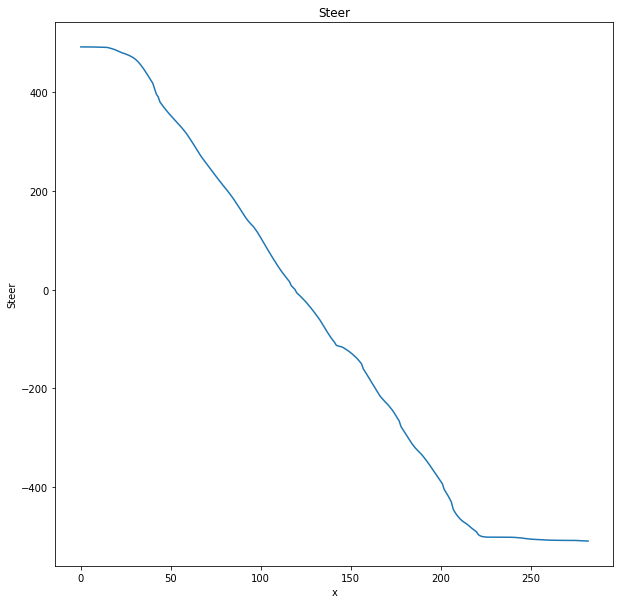

In [61]:
print(len(Angles))
x = np.arange(0,len(Angles))
plt.figure(figsize=(10, 10)) 
plt.plot(x, Angles)
plt.ylabel("Steer")
plt.xlabel("x")
plt.title("Steer")
plt.show()

In [62]:
with open('3_12_wheel_speed_0kmh_35kmh.txt') as f:
    lines = f.readlines()
    
print(len(lines))
print(lines[0])

2062
[index=0][0x06A][8][hnd=0][flag=2][0x00 0x00 0x00 0x00 0x00 0x00 0x00 0x00]



In [80]:
def GetWheelData(line):
    
    if len(line)== 76:
        i = 34
    elif len(line)== 77:
        i = 35
    elif len(line)== 78:
        i = 36
    elif len(line)== 79:
        i = 37 
    elif len(line)== 80:
        i = 38
    
    FL = line[i+8] + line[i+9] + line[i+3] + line[i+4]
    FR = line[i+18] + line[i+19] + line[i+13] + line[i+14]

    RL = line[i+28] + line[i+29] + line[i+23] + line[i+24]
    RR = line[i+38] + line[i+39] + line[i+33] + line[i+34]

    FL = int(FL, 16)
    FR = int(FR, 16)
    RL = int(RL, 16)
    RR = int(RR, 16)
    
    if(FL>32767):
        FL = FL-65536
    
    if(FR>32767):
        FR = FR-65536  
    
    if(RL>32767):
        RL = RL-65536  
        
    if(RR>32767):
        RR = RR-65536  
    
    return FL/100, FR/100, RL/100, RR/100

In [83]:
##TEST
i = 600
print(lines[i])
FL, FR, RL, RR = GetWheelData(lines[i]);
print(FL, FR, RL, RR)

[index=600][0x06A][8][hnd=0][flag=2][0xC9 0x06 0xC5 0x06 0xC0 0x06 0xC0 0x06]

17.37 17.33 17.28 17.28


In [84]:
FLs = []
FRs = []
RLs = []
RRs = []

for i in range(len(lines)):
    
    if len(lines[i])== 76:
        if lines[i][14] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
            
    elif len(lines[i])== 77:   
        if lines[i][15] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);        
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
                    
    elif len(lines[i])== 78:  
        if lines[i][16] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);        
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
                    
    elif len(lines[i])== 79:
        if lines[i][17] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);        
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
                      
    elif len(lines[i])== 80:   
        if lines[i][18] == 'A':
            FL, FR, RL, RR = GetWheelData(lines[i]);        
            FLs.append(FL)
            FRs.append(FR)
            RLs.append(RL)
            RRs.append(RR)
        

In [99]:
#print(FLs)

1383


Text(0.5, 1.0, 'FLs')

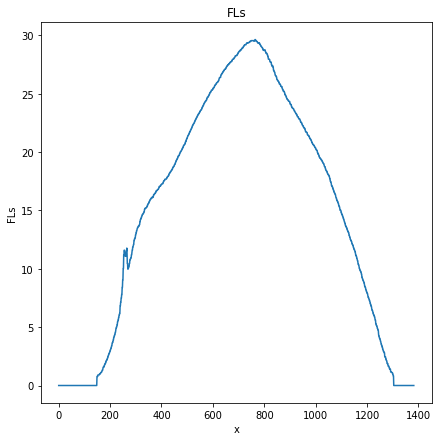

In [101]:
print(len(FLs))

x = np.arange(0,len(FLs))
plt.figure(figsize=(7, 7)) 
plt.plot(x, FLs)
plt.ylabel("FLs")
plt.xlabel("x")
plt.title("FLs")


1383


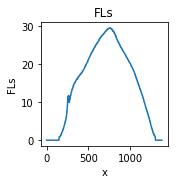

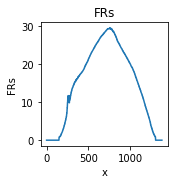

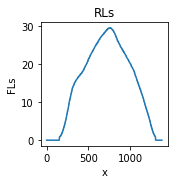

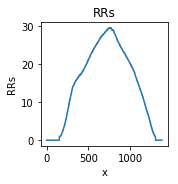

In [102]:
print(len(FLs))

x = np.arange(0,len(FLs))
plt.figure(figsize=(5, 5)) 
plt.subplot(221)
plt.plot(x, FLs)
plt.ylabel("FLs")
plt.xlabel("x")
plt.title("FLs")

x = np.arange(0,len(FRs))
plt.figure(figsize=(5, 5)) 
plt.subplot(222)
plt.plot(x, FRs)
plt.ylabel("FRs")
plt.xlabel("x")
plt.title("FRs")

x = np.arange(0,len(RLs))
plt.figure(figsize=(5, 5)) 
plt.subplot(223)
plt.plot(x, RLs)
plt.ylabel("FLs")
plt.xlabel("x")
plt.title("RLs")

x = np.arange(0,len(RRs))
plt.figure(figsize=(5, 5)) 
plt.subplot(224)
plt.plot(x, RRs)
plt.ylabel("RRs")
plt.xlabel("x")
plt.title("RRs")


plt.show()